---

# Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Original code

In [1]:
num_points = 11
degree = 10
x = np.linspace(0, 10, num_points)
y = x + np.random.random(size=11) - 0.5

import matplotlib.pyplot as plt
p = np.polyfit(x, y, degree)

xx = np.linspace(0, 10, 101)
def fit(xx, degree):
    yy = np.zeros(len(xx))
    for i in range(len(p)):
        yy += xx ** (degree - i) * p[i]
    return yy
yy = fit(xx, degree)

poly_str = ''     
for i in range(degree):
    poly_str += str(p[i]) + 'x^' + str(degree - i) + ' + '
poly_str += str(p[degree])

In [218]:
num_points = 11
degree = 10
x = np.linspace(0, 10, num_points)
y = x + np.random.random(size=11) - 0.5

# https://numpy.org/doc/stable/reference/routines.polynomials.html
p = np.polynomial.Polynomial.fit(x, y, degree)

xx, yy = p.linspace(n=100, domain=[0,10])

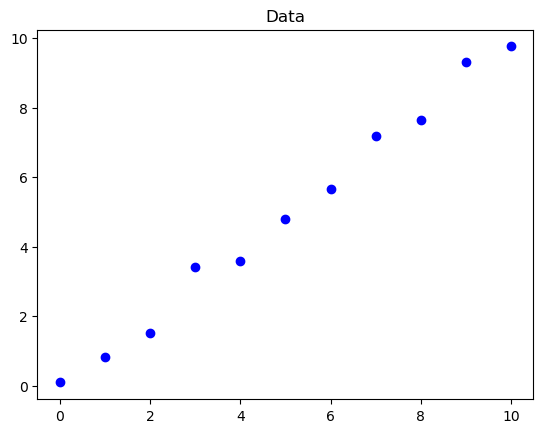

In [219]:
plt.plot(x, y, 'bo')
plt.title('Data')
plt.show()

In [3]:
print('y = x + u, u ~ U(-0.5, 0.5)')

y = x + u, u ~ U(-0.5, 0.5)


Which model do you prefer?

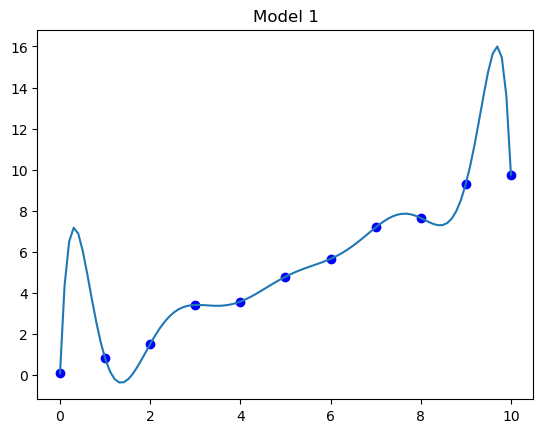

In [220]:
plt.plot(x, y, 'bo')
plt.plot(xx, yy)
plt.title('Model 1')
plt.show()

Model 1

In [224]:
print(p)

4.793417458158821 + 5.60892645795294·x¹ - 10.330117439867436·x² -
12.44622770563306·x³ + 182.4481175986644·x⁴ + 54.62642217398582·x⁵ -
788.9183171834026·x⁶ - 79.51110932186539·x⁷ + 1204.0437158164596·x⁸ +
36.55696556477602·x⁹ - 587.1072302657391·x¹⁰


The mathematical form of model 1. A tenth order polynomial.

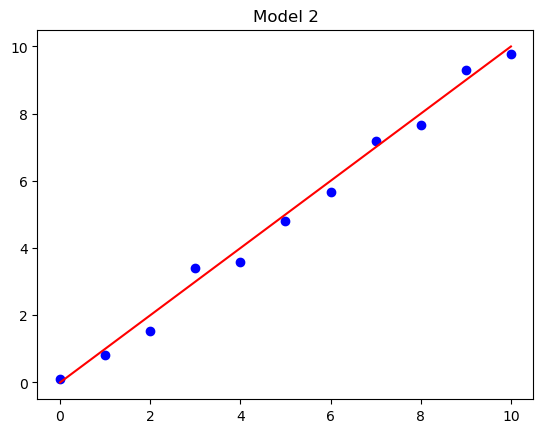

In [225]:
plt.plot(x, y, 'bo')
plt.plot(x, x, 'r')
plt.title('Model 2')
plt.show()

In [7]:
print('y = x')

y = x


Prefer a *simple* model (Occam's razor).

I expect you prefer model 2. We prefer simple models - that's **Occam's razor**.

The tenth order polynomial fits our data perfectly, but the fit is too good.

Model 1 won't generalise because the shape of the fit is too specific.

---

## Stack Overflow

Adapted from [here](https://stackoverflow.com/a/67498263).

In [2]:
def distance(x, y, x0, y0):
    """
    Return distance between point
    P[x0,y0] and a curve (x,y)
    """
    d_x = x - x0
    d_y = y - y0
    dis = np.sqrt(d_x**2 + d_y**2)
    return dis

def min_distance(x, y, P, precision=5):
    """
    Compute minimum/a distance/s between
    a point P[x0,y0] and a curve (x,y)
    rounded at `precision`.
    
    ARGS:
        x, y      (array)
        P         (tuple)
        precision (int)
        
    Returns min indexes and distances array.
    """
    # compute distance
    d = distance(x, y, P[0], P[1])
    d = np.round(d, precision)
    # find the minima
    glob_min_idxs = np.argwhere(d==np.min(d)).ravel()
    return glob_min_idxs, d

In [3]:
def noisy_line(x, r=3):
    return x + np.random.random(size=x.shape) * r - r/2 # and adding some noise: y = x + u | u ~ U(-r/2, r/2)

In [193]:
def plot_polynomial(degree, train_x, train_y, test_x, test_y, fn, domain, xlim,ylim):
    
    p = np.polynomial.Polynomial.fit(train_x,train_y, deg=degree)

    xx, yy = p.linspace(n=10000, domain=domain)

    fig, ax = plt.subplots(figsize=(7, 7))

    ax.scatter(train_x, train_y, label="train data")
    ax.scatter(test_x, test_y, marker='x', label="test data")

    ax.plot(xx, fn(xx, r=0), '--k', label="ground truth")
    ax.plot(xx, yy, label="model")

    # error on training set
    train_distances = []
    for t_x, t_y in zip(train_x, train_y):
        min_idxs, dis = min_distance(xx, yy, [t_x, t_y], precision=10)
        for idx in min_idxs:
            ax.plot(
                [t_x, xx[idx]],
                [t_y, yy[idx]],
                '--', lw=1,
                label=f'train distance {dis[idx]:.2f}'
            )
        train_distances.append(dis[min_idxs[0]]) # only count the min distance once
    train_distances = np.array(train_distances)


    # error on test set
    test_distances = []
    for t_x, t_y in zip(test_x, test_y):
        min_idxs, dis = min_distance(xx, yy, [t_x, t_y], precision=10)
        for idx in min_idxs:
            ax.plot(
                [t_x, xx[idx]],
                [t_y, yy[idx]],
                '--', lw=1,
                label=f'test distance {dis[idx]:.2f}'
            )
        test_distances.append(dis[min_idxs[0]]) # only count the min distance once
    test_distances = np.array(test_distances)

    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    ax.set_aspect('equal', 'box')
    ax.set(
        xlim=xlim,
        ylim=ylim,
    )
    plt.title(f"Model of degree {degree} | MSE train: {np.abs(train_distances).mean():.4f} | MSE test: {np.abs(test_distances).mean():.4f}")
    plt.grid()
    plt.show()

---

## Example 1: a line

In [194]:
num_points = 11
train_x = np.linspace(1, 9, num_points)      # creating 11 points on a line,
train_y = noisy_line(train_x)

test_x = np.linspace(0, 11, num_points)      # creating 11 points on a line,
test_y = noisy_line(test_x)

### Good fit

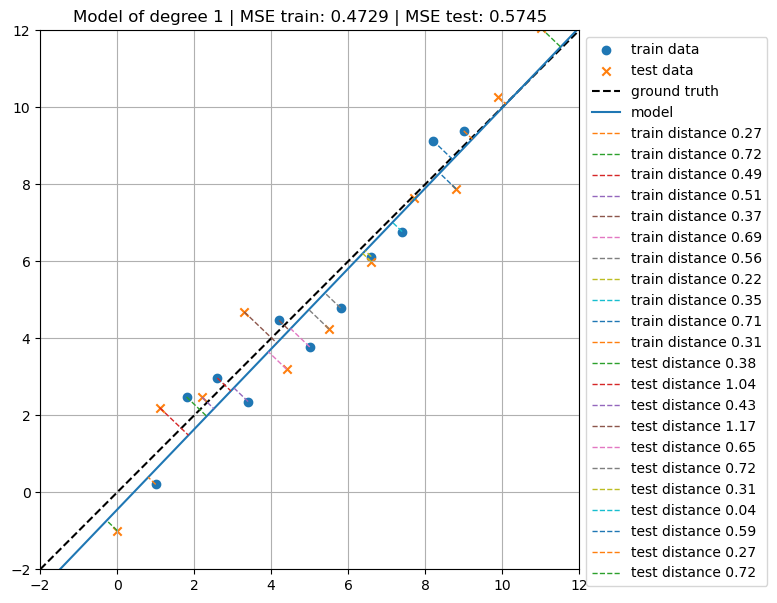

In [195]:
degree = 1
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_line, domain=[-2,12], xlim=[-2,12], ylim=[-2,12])

### Overfitting

Note that the train MSE **improves** while the test MSE worsens.

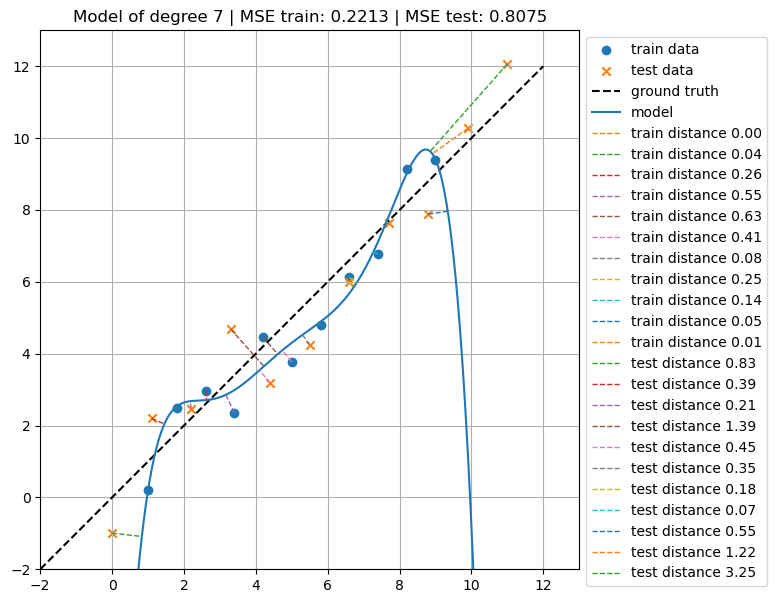

In [197]:
degree = 7
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_line, domain=[-2,12], xlim=[-2,13], ylim=[-2,13])

---

## Example 2: a parabola

In [198]:
def noisy_curve(x, r=.5):
    return (x + np.random.random(size=x.shape) * r - r/2)**2 # and adding some noise: y = (x + u)^2 | u ~ U(-r/2, r/2)

In [199]:
num_points = 10
domain = np.array([-2, 2])

train_x = np.linspace(*domain, num_points)
train_y = noisy_curve(train_x)

test_x = np.linspace(*(domain * 1.5), num_points)    
test_y = noisy_curve(test_x)

## Underfitting

Pretty bad MSE on both train and test.

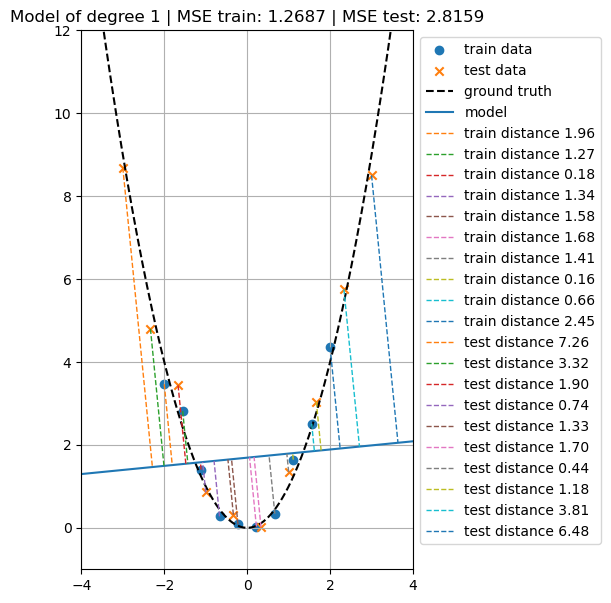

In [200]:
degree = 1
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

## Good fit

Much better MSE on both train and test.

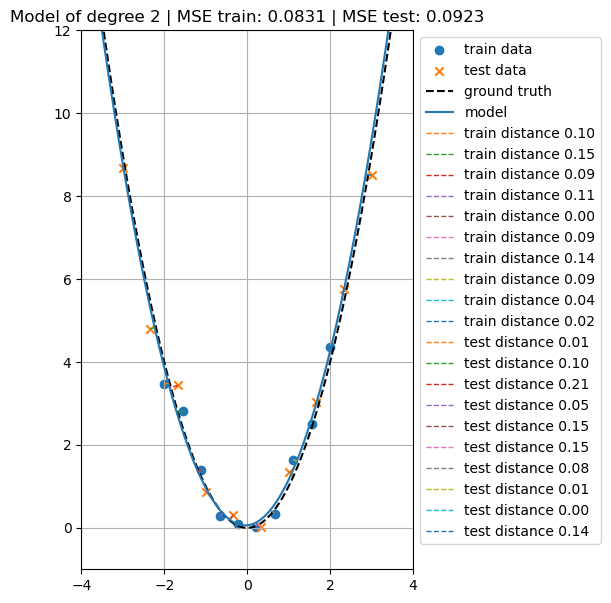

In [201]:
degree = 2
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

## Overfitting

The train MSE is **even better** than the good fit while on test we do worse!

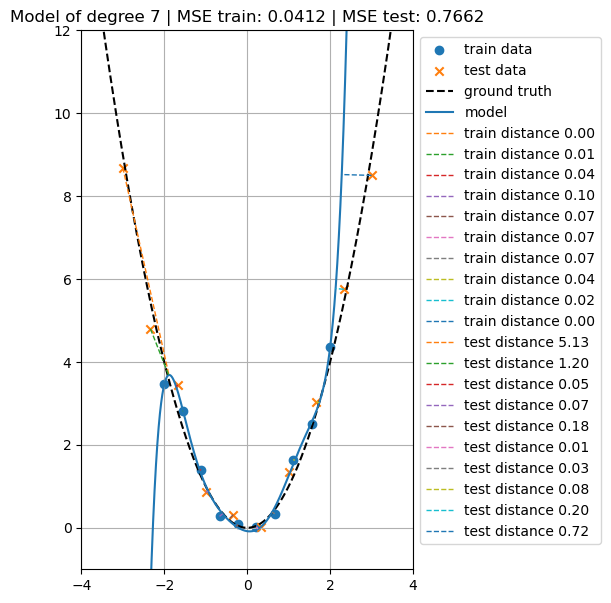

In [231]:
degree = 7
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

#### Why is this relevant?

Because **neural networks adapt their complexity during training** to find the best model for their data.

They can be as simple as a line model, or, in most cases, so complex they fit every single training data point.

#### Double Descent

*Not in the Chollet nor in what you're supposed to know.*

Training on large neural nets has led researchers to come across a phenomenon not described here.

What happens when your neural net is sufficiently complex to fit all your data points ("beyond" the overfitting graphs above)?

It seems that the situation with overfitting can **actually improve somewhat**. 

This is called **Double Descent**. It is an active area of research.

![OpenAI Double Descent](images/overfitting/openai.double-descent.png)

##### References

["Deep Double Descent", OpenAI blog](https://openai.com/blog/deep-double-descent)  
[Nakkiran et al, "Deep Double Descent: Where Bigger Models and More Data Hurt", arXiv](https://arxiv.org/abs/1912.02292)  
[Daniella Witten, double descent, Twitter](https://twitter.com/daniela_witten/status/1292293102103748609?t=ipZls3q9Cf8QRZdp54Ug8w&s=19)    
[adad8m, double descent, Twitter](https://twitter.com/adad8m/status/1582231644223987712?t=fQJ3wE-I2Y1wLb8zBCnn3g&s=03)  